<a href="https://colab.research.google.com/github/joanizba/Spotifypred/blob/dev_joan/R_proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rows: 2300 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): playlist_url, track_id, track_name, album, artist_id, artist_name,...
dbl (16): year, track_popularity, artist_popularity, danceability, energy, k...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Datos cargados exitosamente.
Dimensiones del dataset: 2300 23 

Estructura inicial de los datos (primeras filas y tipos):
Rows: 2,300
Columns: 23
$ playlist_url      <chr> "https://open.spotify.com/playlist/37i9dQZF1DWUZv12G…
$ year              <dbl> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000…
$ track_id          <chr> "3AJwUDP919kvQ9QcozQPxg", "2m1hi0nfMR9vdGC8UcrnwU", …
$ track_name        <chr> "Yellow", "All The Small Things", "Breathe", "In the…
$ track_popularity  <dbl> 91, 84, 69, 88, 74, 73, 88, 57, 80, 83, 82, 82, 79, …
$ album             <chr> "Parachutes", "Enema Of The State", "Breathe", "Hybr…
$ artist_id         <chr> "4gzpq5DPGxSnKTe4SA8HAU", "6FBDaR13swtiWwGhX1WQsP", …
$ artist_name       <chr> "Coldplay", "blink-182", "Faith Hill", "Linkin Park"…
$ artist_genres     <chr> "['permanent wave', 'pop']", "['alternative metal', …
$ artist_popularity <dbl> 86, 75, 61, 83, 65, 56, 88, 69, 69, 80, 69, 78, 58, …
$ danceability      <dbl> 0.429, 0.434, 0.529, 0.556, 

`summarise()` has grouped output by 'artist_id'. You can override using the
`.groups` argument.


<table class="table table-striped table-hover table-condensed" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Top 10 Artistas por Popularidad Media</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> artist_id </th>
   <th style="text-align:left;"> artist_name </th>
   <th style="text-align:right;"> avg_artist_popularity </th>
   <th style="text-align:right;"> n_tracks </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> 06HL4z0CvFAxyc27GXpf02 </td>
   <td style="text-align:left;"> Taylor Swift </td>
   <td style="text-align:right;"> 100 </td>
   <td style="text-align:right;"> 30 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> 1Xyo4u8uXC1ZmMpatF05PJ </td>
   <td style="text-align:left;"> The Weeknd </td>
   <td style="text-align:right;"> 94 </td>
   <td style="text-align:right;"> 15 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> 3TVXtAsR1Inumwj472S9r4 </td>
   <td style="text-align:left;"> Drake </td>
   <td style

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


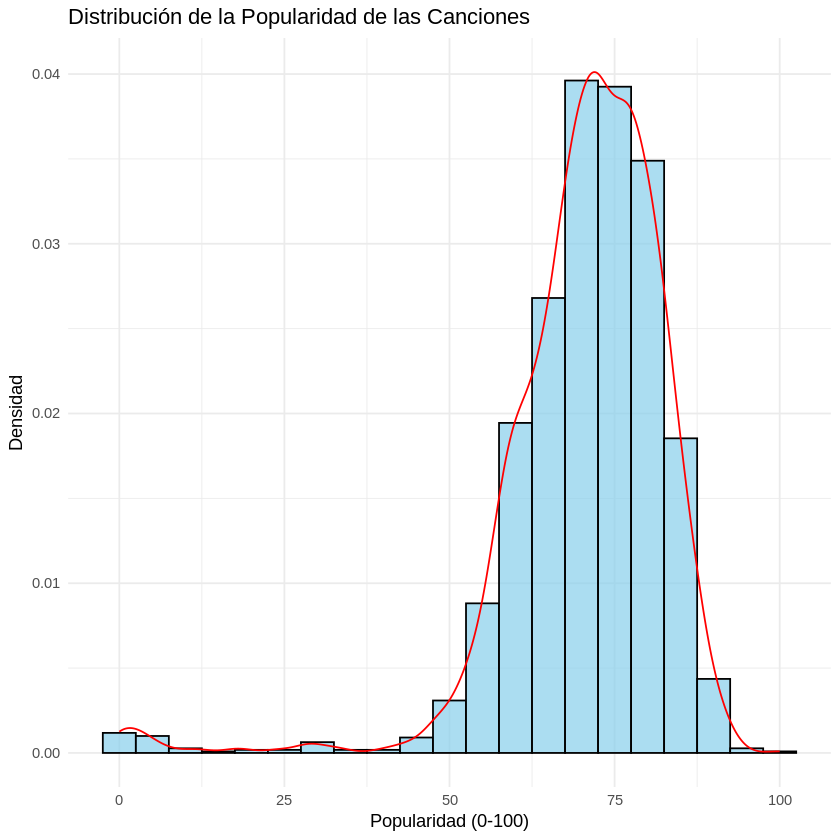

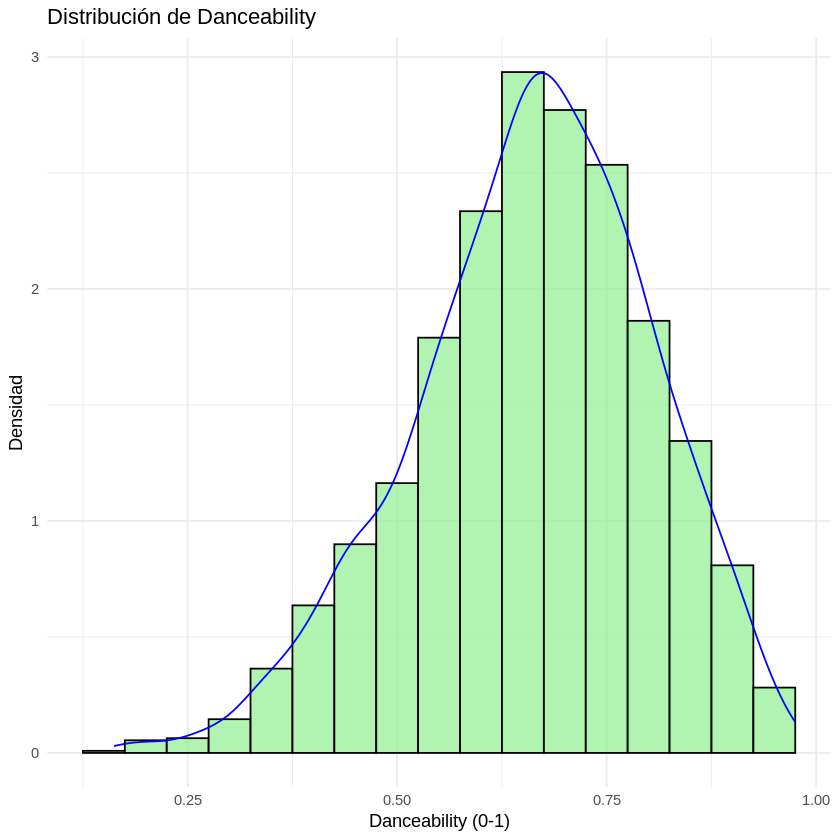

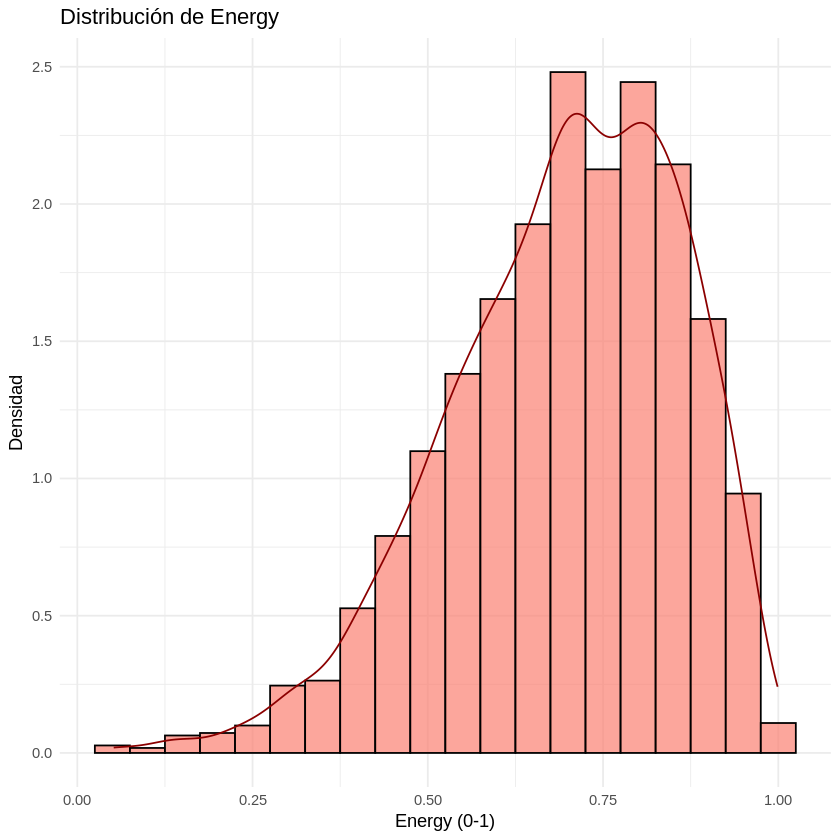

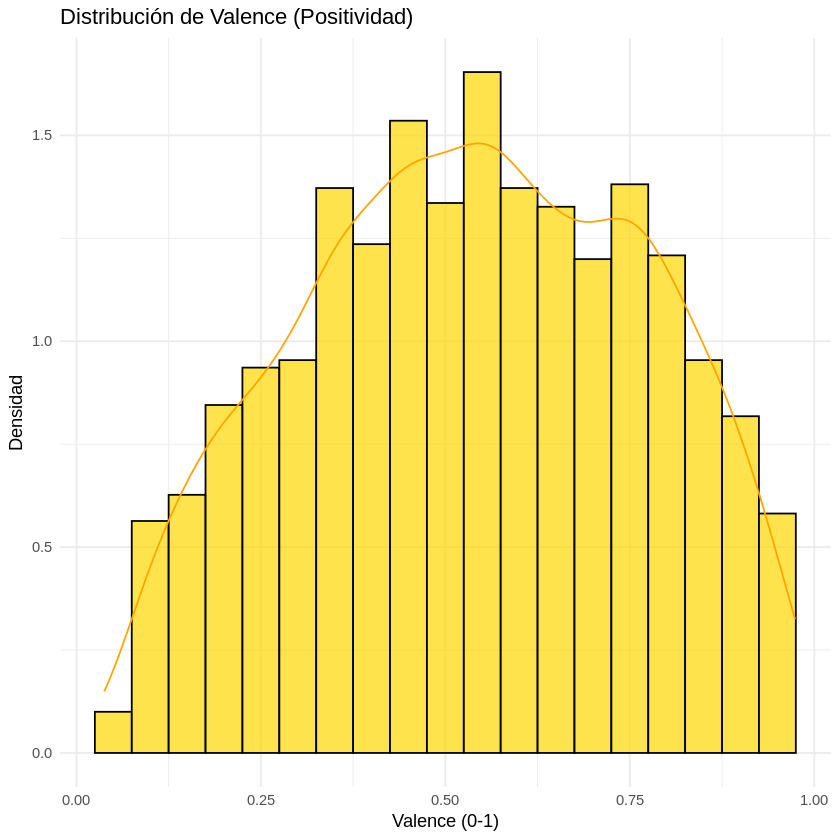


Generando heatmap de correlación...


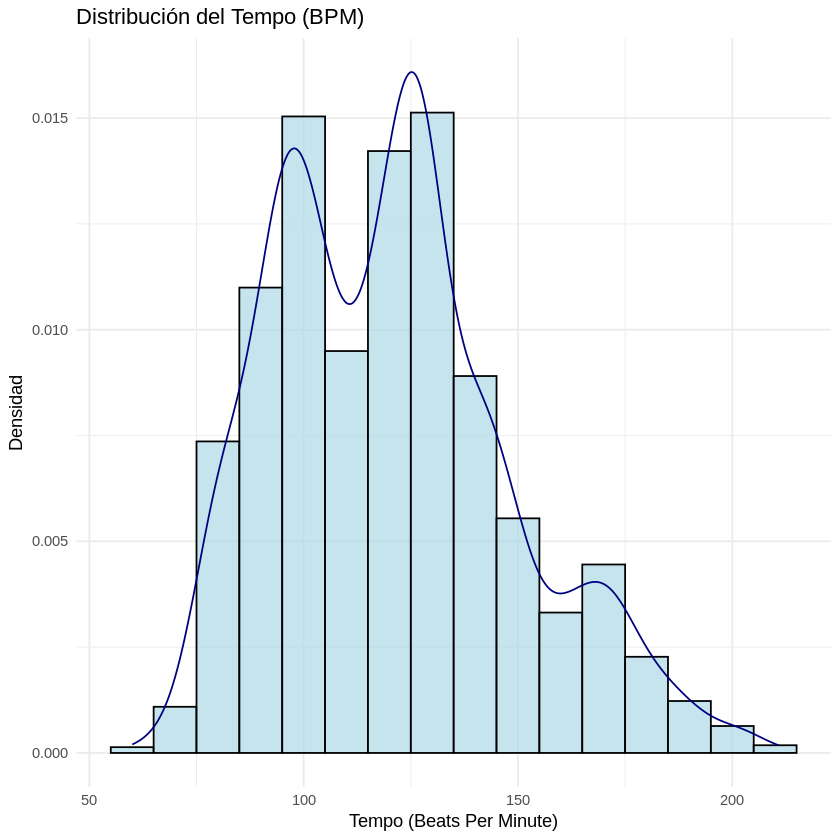

`geom_smooth()` using formula = 'y ~ x'


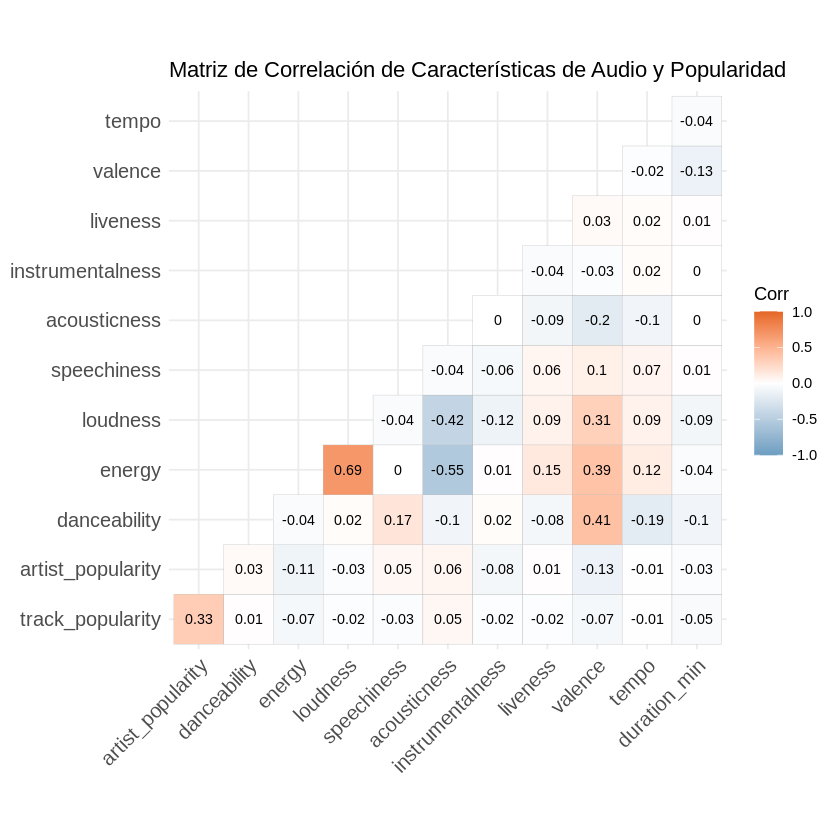

`geom_smooth()` using formula = 'y ~ x'


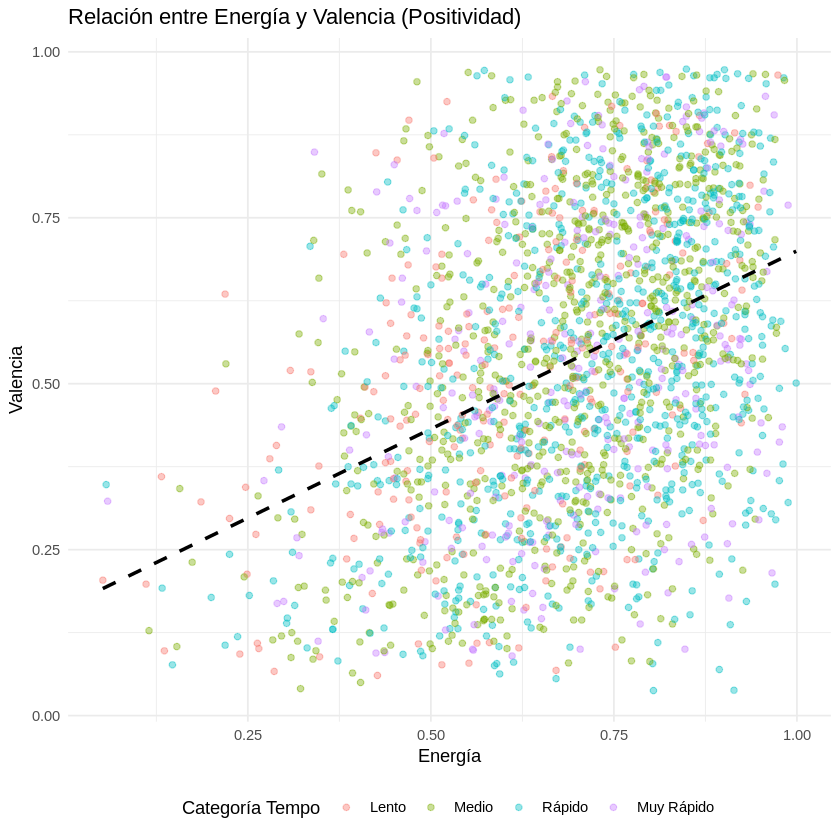

`geom_smooth()` using formula = 'y ~ x'


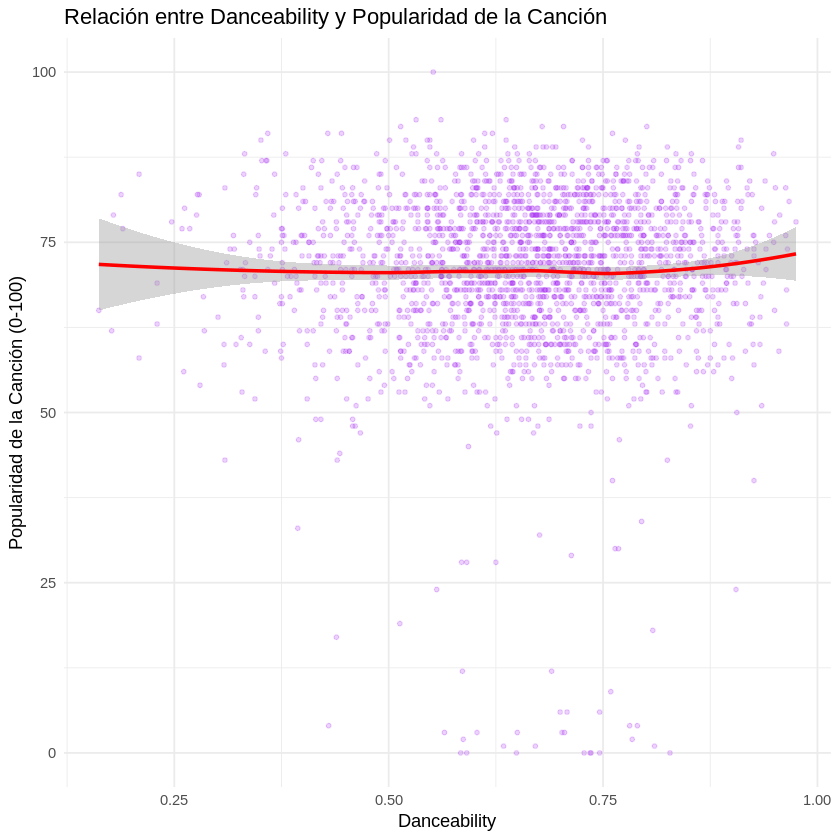

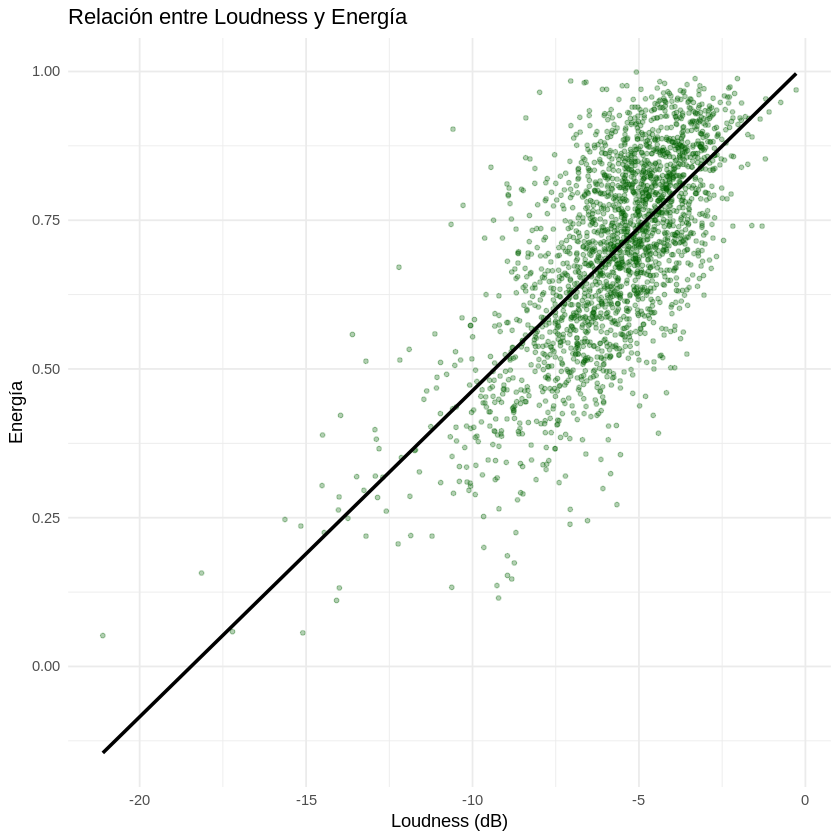

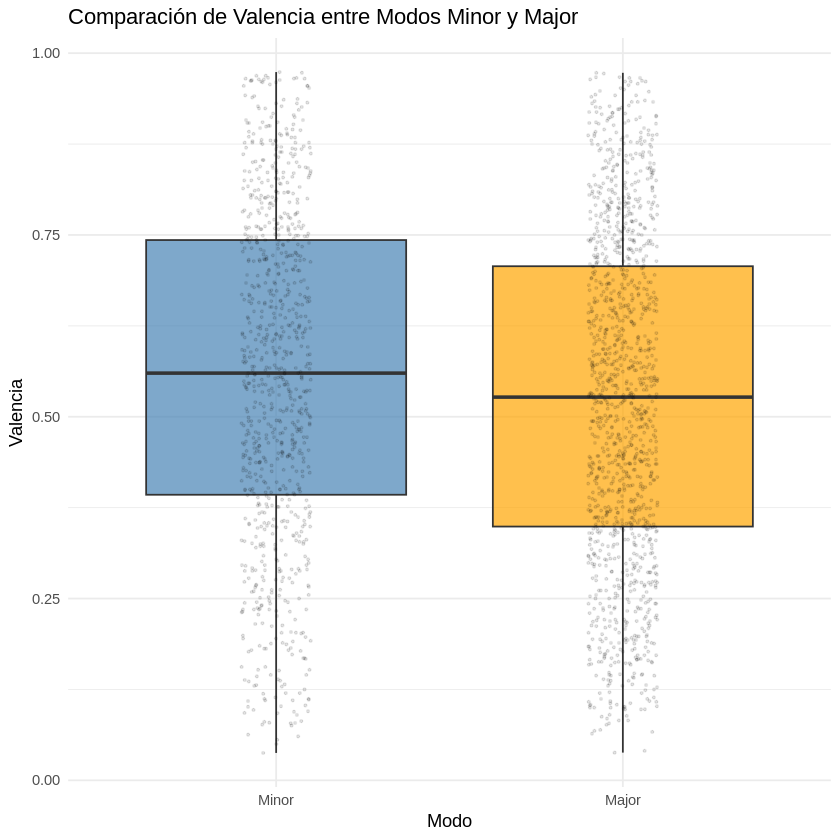


Generando gráficos de tendencias anuales...


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


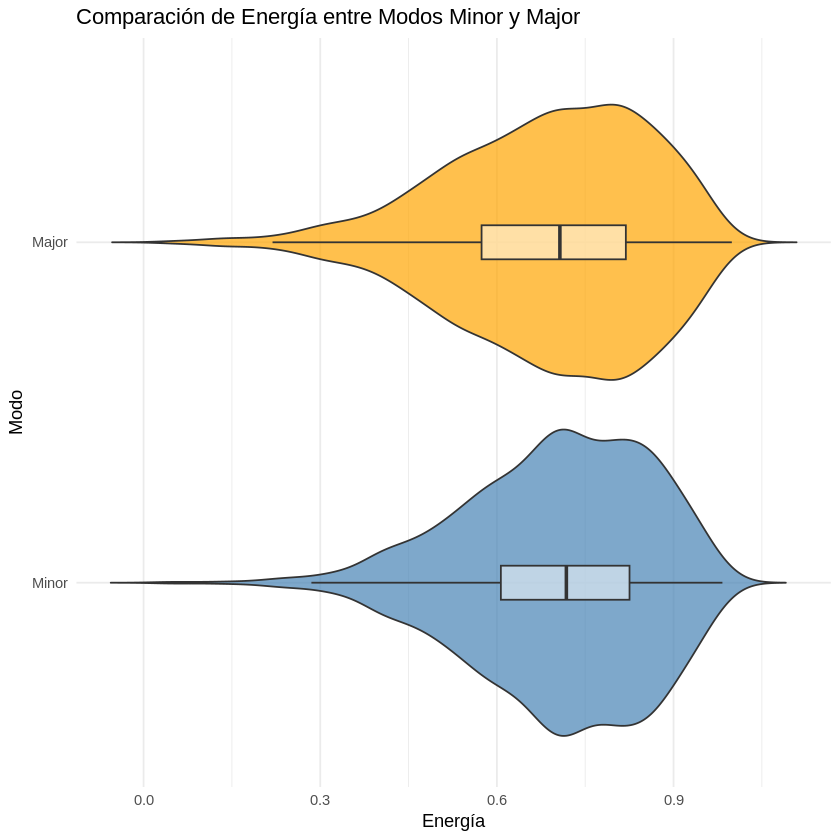

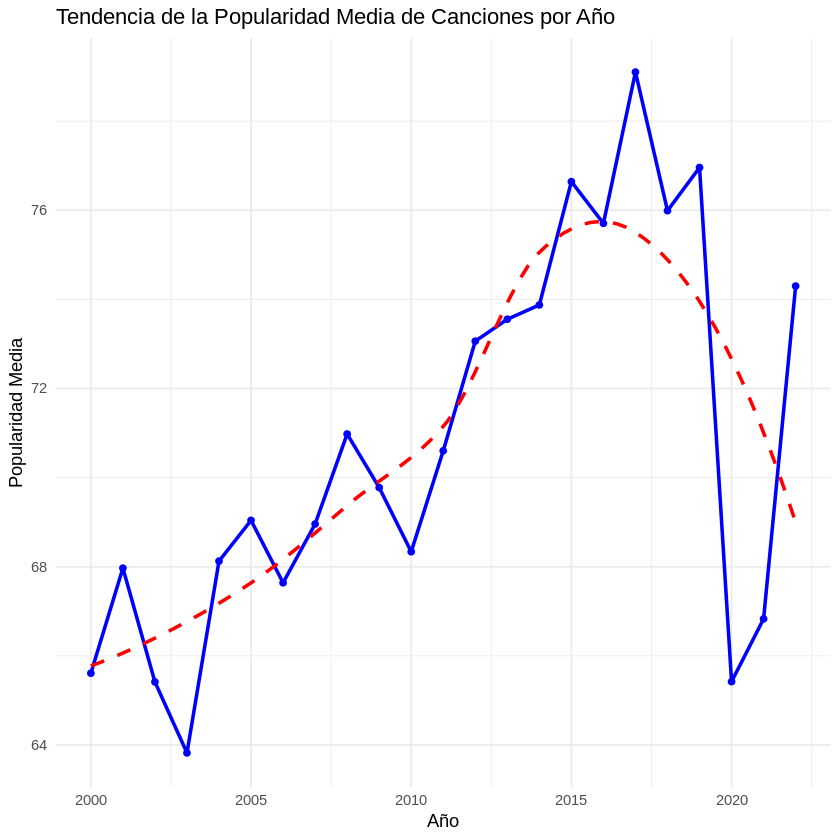

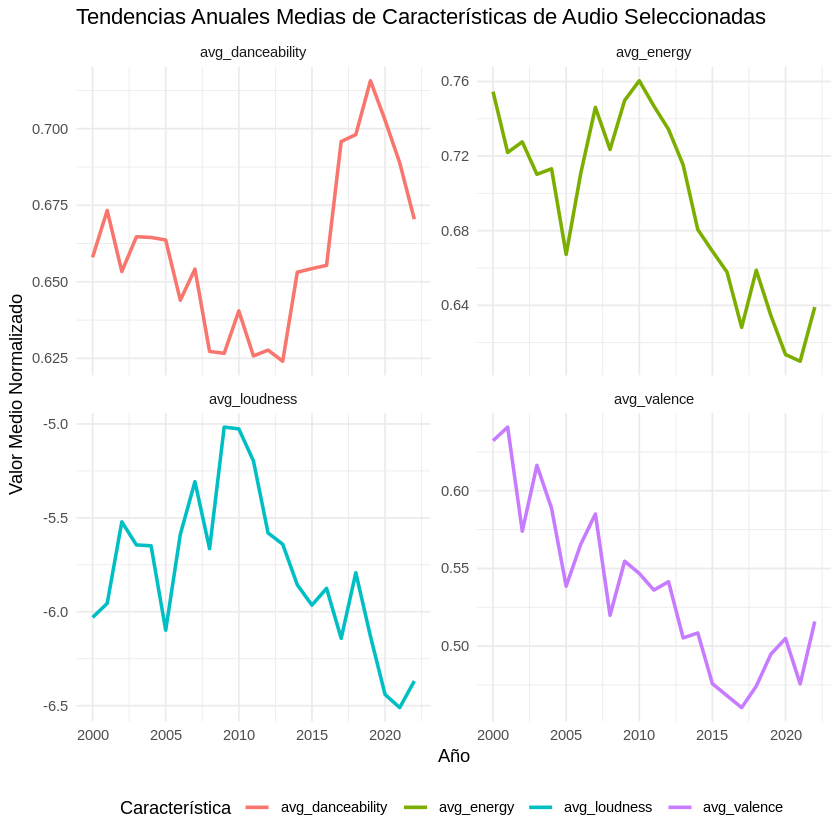


--- Análisis Completado ---
Se han realizado la limpieza, manipulación, análisis descriptivo y visualización.
Observaciones Clave (Ejemplos):
- Revisa los gráficos de distribución para entender el rango típico de cada característica.
- La matriz de correlación muestra relaciones interesantes (e.g., energía vs loudness, energía vs valencia).
- La popularidad parece tener una correlación (posiblemente no lineal) con danceability (ver scatter plot).
- Existen diferencias en características como valencia y energía entre modos Major y Minor (ver boxplots/violins).
- Las tendencias anuales (si se analizaron) pueden mostrar cómo ha evolucionado la música en el dataset.

Próximos Pasos Sugeridos:
1.  **Análisis de Géneros Avanzado:** Usar `tidyr::separate_rows(artist_genres, sep = ', ')` para separar la lista de géneros y analizar características por género individual.
2.  **Modelado Predictivo:** Intentar predecir `track_popularity` usando las características de audio (regresión).
3.  **Clus

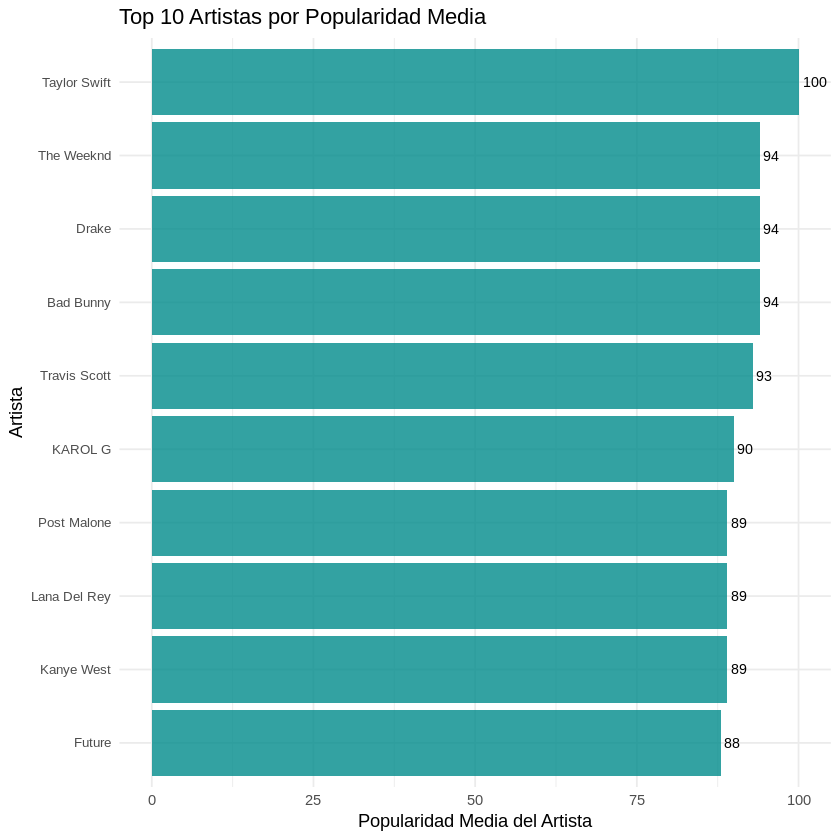

In [ ]:
# --- 0. Preparación ---

# Instalar paquetes si no los tienes (descomenta la línea si es necesario)
# install.packages("tidyverse")
# install.packages("ggcorrplot") # Para el heatmap de correlación
# install.packages("knitr")      # Para tablas bonitas (opcional)
# install.packages("kableExtra") # Para tablas bonitas (opcional)

# Cargar las librerías necesarias
library(tidyverse) # Incluye dplyr, ggplot2, tidyr, readr, etc.
library(ggcorrplot) # Para visualización de matrices de correlación
library(knitr)      # Para mostrar tablas formateadas
library(kableExtra) # Mejoras para tablas kable

# --- 1. Carga de Datos ---
# ASUNCIÓN: Tus datos están en un archivo CSV llamado "spotify_data.csv"
#           en el mismo directorio que este script.
#           AJUSTA la ruta y el nombre del archivo según sea necesario.
#           Si ya tienes los datos cargados en un dataframe llamado 'mi_dataframe',
#           simplemente asigna ese nombre a 'spotify_data'.

# tryCatch maneja posibles errores al leer el archivo
tryCatch({
  spotify_data <- read_csv("playlist_2010to2022.csv")
  # O si ya lo tienes cargado:
  # spotify_data <- tu_dataframe_existente

  cat("Datos cargados exitosamente.\n")
  cat("Dimensiones del dataset:", dim(spotify_data), "\n")

  # Vistazo inicial a la estructura y tipos de datos
  cat("\nEstructura inicial de los datos (primeras filas y tipos):\n")
  glimpse(spotify_data)

}, error = function(e) {
  stop("Error al cargar el archivo CSV. Asegúrate de que 'spotify_data.csv' existe ",
       "en el directorio de trabajo o proporciona la ruta correcta. Error original: ", e$message)
})


# --- 2. Limpieza y Manipulación de Datos (dplyr) ---

cat("\n--- Iniciando Limpieza y Manipulación ---\n")

spotify_clean <- spotify_data %>%
  # 2.1. Selección de columnas (si quisieras descartar alguna)
  # select(-columna_a_descartar) # Ejemplo, mantenemos todas por ahora

  # 2.2. Conversión de tipos de datos y creación de nuevas variables
  mutate(
    # Convertir año a factor o dejarlo numérico (depende del análisis)
    # year = factor(year), # Descomentar si prefieres tratar año como categoría

    # Convertir columnas categóricas a factores (útil para ggplot y modelos)
    key = factor(key),
    mode = factor(mode, levels = c(0, 1), labels = c("Minor", "Major")), # Asigna etiquetas claras
    time_signature = factor(time_signature),

    # Crear duración en minutos para mejor interpretabilidad
    duration_min = duration_ms / 60000,

    # Crear categorías de tempo (ejemplo con cuartiles)
    # tempo_category = cut(tempo,
    #                      breaks = quantile(tempo, probs = 0:4/4, na.rm = TRUE),
    #                      labels = c("Muy Lento", "Lento", "Medio", "Rápido"),
    #                      include.lowest = TRUE),
    # O una categorización más simple:
    tempo_category = case_when(
        tempo < 90 ~ "Lento",
        tempo >= 90 & tempo < 120 ~ "Medio",
        tempo >= 120 & tempo < 150 ~ "Rápido",
        tempo >= 150 ~ "Muy Rápido",
        TRUE ~ NA_character_ # Maneja NAs si existen en tempo
    ) %>% factor(levels = c("Lento", "Medio", "Rápido", "Muy Rápido")), # Ordenar niveles

    # Simplificar géneros (tomar el primer género si hay muchos) - ¡OJO! Esto es una simplificación.
    # Un análisis más profundo requeriría separar todos los géneros (ver nota al final).
    primary_genre = str_extract(artist_genres, "[^,]+") %>% str_trim() %>% tolower()
    # primary_genre = na_if(primary_genre, "[]") # Si algunos géneros son solo "[]"
  ) %>%

  # 2.3. Manejo de valores Nulos (NA) - Estrategia: Revisar y decidir
  # Contar NAs por columna
  # summarize(across(everything(), ~sum(is.na(.)))) %>% print() # Descomentar para ver NAs

  # Estrategia simple: Eliminar filas con NA en columnas clave (ej: audio features)
  # OJO: Considera imputación si eliminar filas quita demasiados datos.
  drop_na(danceability, energy, loudness, valence, tempo, track_popularity, artist_popularity) %>%

  # 2.4. Filtrado (opcional, ejemplo: quedarse con años recientes)
  # filter(year >= 2010)

  # 2.5. Eliminar duplicados de tracks (si un track aparece en múltiples playlists pero queremos análisis a nivel de track)
  # ¡CUIDADO! Decide si quieres análisis por aparición en playlist o por track único.
  distinct(track_id, .keep_all = TRUE) # Mantiene la primera aparición de cada track_id

cat("Limpieza y manipulación completadas.\n")
cat("Nuevas dimensiones:", dim(spotify_clean), "\n")
cat("\nEstructura de los datos limpios (primeras filas y tipos):\n")
glimpse(spotify_clean)


# --- 3. Análisis Estadístico Descriptivo ---

cat("\n--- Iniciando Análisis Estadístico Descriptivo ---\n")

# 3.1. Resumen estadístico general para variables numéricas clave
summary_stats <- spotify_clean %>%
  select(track_popularity, artist_popularity, danceability, energy, loudness,
         speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_min) %>%
  summary()

cat("\nResumen estadístico de variables numéricas clave:\n")
print(summary_stats)

# 3.2. Resumen de variables categóricas
cat("\nFrecuencia de Modos (Minor/Major):\n")
spotify_clean %>% count(mode) %>% print()

cat("\nFrecuencia de Tonalidades (Key):\n")
spotify_clean %>% count(key, sort = TRUE) %>% print()

cat("\nFrecuencia de Compases (Time Signature):\n")
spotify_clean %>% count(time_signature, sort = TRUE) %>% print()

cat("\nFrecuencia de Categorías de Tempo:\n")
spotify_clean %>% count(tempo_category, sort = TRUE) %>% print()

# --- 3.3. Correlación entre características de audio y popularidad ---
cat("\nCalculando matriz de correlación...\n")
# Seleccionar solo columnas numéricas relevantes para la correlación
numeric_features <- spotify_clean %>%
  select(track_popularity, artist_popularity, danceability, energy, loudness,
         speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_min) # Removing 'key' from here

# Calcular matriz de correlación (usando método de Pearson)
cor_matrix <- cor(numeric_features, use = "pairwise.complete.obs") # 'pairwise' maneja NAs restantes


cat("\nMatriz de correlación (primeras 6x6):\n")
print(round(cor_matrix[1:6, 1:6], 2)) # Mostrar una parte

# 3.4. Análisis por año (si 'year' se mantuvo numérico)
if (is.numeric(spotify_clean$year)) {
  cat("\nAnálisis de tendencias anuales (media de características):\n")
  yearly_summary <- spotify_clean %>%
    filter(year > 0) %>% # Asegurarse que no haya años inválidos si aplica
    group_by(year) %>%
    summarise(
      avg_popularity = mean(track_popularity, na.rm = TRUE),
      avg_danceability = mean(danceability, na.rm = TRUE),
      avg_energy = mean(energy, na.rm = TRUE),
      avg_valence = mean(valence, na.rm = TRUE),
      avg_loudness = mean(loudness, na.rm = TRUE),
      n_tracks = n() # Número de tracks por año en el dataset limpio
    ) %>%
    arrange(year)

  print(tail(yearly_summary)) # Mostrar los últimos años
} else {
  cat("\n'year' no es numérico, se omite el análisis de tendencias anuales numéricas.\n")
}

# 3.5. Artistas más populares (basado en popularidad media del artista)
cat("\nTop 10 Artistas por Popularidad Media:\n")
top_artists_popularity <- spotify_clean %>%
  group_by(artist_id, artist_name) %>%
  summarise(
    avg_artist_popularity = mean(artist_popularity, na.rm = TRUE),
    n_tracks = n()
  ) %>%
  ungroup() %>% # Desagrupar para el arrange
  arrange(desc(avg_artist_popularity)) %>%
  slice_head(n = 10) # Tomar los 10 primeros

# Mostrar tabla formateada si knitr y kableExtra están instalados
if (require(knitr) && require(kableExtra)) {
    top_artists_popularity %>%
    kable(caption = "Top 10 Artistas por Popularidad Media", digits = 1) %>%
    kable_styling(bootstrap_options = c("striped", "hover", "condensed"), full_width = F) %>%
    print()
} else {
    print(top_artists_popularity)
}


# 3.6. Tracks más populares
cat("\nTop 10 Tracks por Popularidad:\n")
top_tracks_popularity <- spotify_clean %>%
  select(track_name, artist_name, album, track_popularity, year) %>%
  arrange(desc(track_popularity)) %>%
  distinct(track_name, artist_name, .keep_all = TRUE) %>% # Evitar duplicados si un track está en varios álbumes (raro pero posible)
  slice_head(n = 10)

if (require(knitr) && require(kableExtra)) {
    top_tracks_popularity %>%
    kable(caption = "Top 10 Tracks por Popularidad") %>%
    kable_styling(bootstrap_options = c("striped", "hover", "condensed"), full_width = F) %>%
    print()
} else {
    print(top_tracks_popularity)
}


# --- 4. Visualización de Datos (ggplot2) ---

cat("\n--- Iniciando Visualización de Datos ---\n")

# 4.1. Distribución de variables numéricas clave
p1 <- ggplot(spotify_clean, aes(x = track_popularity)) +
  geom_histogram(aes(y = ..density..), binwidth = 5, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_density(color = "red") +
  labs(title = "Distribución de la Popularidad de las Canciones", x = "Popularidad (0-100)", y = "Densidad") +
  theme_minimal()
print(p1)

p2 <- ggplot(spotify_clean, aes(x = danceability)) +
  geom_histogram(aes(y = ..density..), binwidth = 0.05, fill = "lightgreen", color = "black", alpha = 0.7) +
  geom_density(color = "blue") +
  labs(title = "Distribución de Danceability", x = "Danceability (0-1)", y = "Densidad") +
  theme_minimal()
print(p2)

p3 <- ggplot(spotify_clean, aes(x = energy)) +
  geom_histogram(aes(y = ..density..), binwidth = 0.05, fill = "salmon", color = "black", alpha = 0.7) +
  geom_density(color = "darkred") +
  labs(title = "Distribución de Energy", x = "Energy (0-1)", y = "Densidad") +
  theme_minimal()
print(p3)

p4 <- ggplot(spotify_clean, aes(x = valence)) +
  geom_histogram(aes(y = ..density..), binwidth = 0.05, fill = "gold", color = "black", alpha = 0.7) +
  geom_density(color = "orange") +
  labs(title = "Distribución de Valence (Positividad)", x = "Valence (0-1)", y = "Densidad") +
  theme_minimal()
print(p4)

p5 <- ggplot(spotify_clean, aes(x = tempo)) +
  geom_histogram(aes(y = ..density..), binwidth = 10, fill = "lightblue", color = "black", alpha = 0.7) +
  geom_density(color = "navy") +
  labs(title = "Distribución del Tempo (BPM)", x = "Tempo (Beats Per Minute)", y = "Densidad") +
  theme_minimal()
print(p5)

# 4.2. Visualización de la Matriz de Correlación
cat("\nGenerando heatmap de correlación...\n")
p_corr <- ggcorrplot(cor_matrix,
                     method = "square", # o "circle"
                     type = "lower",    # Muestra solo la matriz triangular inferior
                     lab = TRUE,        # Muestra los coeficientes de correlación
                     lab_size = 3,
                     colors = c("#6D9EC1", "white", "#E46726"), # Esquema de color (azul-blanco-rojo)
                     title = "Matriz de Correlación de Características de Audio y Popularidad") +
          theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotar etiquetas eje x
print(p_corr)


# 4.3. Relación entre características
p6 <- ggplot(spotify_clean, aes(x = energy, y = valence)) +
  geom_point(aes(color = tempo_category), alpha = 0.4, size = 1.5) + # Puntos coloreados por categoría de tempo
  geom_smooth(method = "lm", color = "black", se = FALSE, linetype = "dashed") + # Línea de tendencia lineal
  labs(title = "Relación entre Energía y Valencia (Positividad)",
       x = "Energía", y = "Valencia", color = "Categoría Tempo") +
  theme_minimal() +
  theme(legend.position = "bottom")
print(p6)

p7 <- ggplot(spotify_clean, aes(x = danceability, y = track_popularity)) +
  geom_point(alpha = 0.2, size = 1, color="purple") +
  geom_smooth(method = "loess", color = "red", se = TRUE) + # 'loess' para una curva más flexible
  labs(title = "Relación entre Danceability y Popularidad de la Canción",
       x = "Danceability", y = "Popularidad de la Canción (0-100)") +
  theme_minimal()
print(p7)

p8 <- ggplot(spotify_clean, aes(x = loudness, y = energy)) +
  geom_point(alpha = 0.3, size = 1, color="darkgreen") +
  geom_smooth(method = "lm", color = "black", se = FALSE) +
  labs(title = "Relación entre Loudness y Energía",
       x = "Loudness (dB)", y = "Energía") +
  theme_minimal()
print(p8)


# 4.4. Comparación de características por Modo (Major/Minor)
p9 <- ggplot(spotify_clean, aes(x = mode, y = valence, fill = mode)) +
  geom_boxplot(alpha = 0.7, outlier.shape = NA) + # Ocultar outliers para claridad, o usar geom_jitter
  geom_jitter(width = 0.1, alpha = 0.1, size = 0.5) + # Añadir puntos para ver densidad
  scale_fill_manual(values = c("Minor" = "steelblue", "Major" = "orange")) +
  labs(title = "Comparación de Valencia entre Modos Minor y Major",
       x = "Modo", y = "Valencia") +
  theme_minimal() +
  theme(legend.position = "none")
print(p9)

p10 <- ggplot(spotify_clean, aes(x = mode, y = energy, fill = mode)) +
  geom_violin(alpha = 0.7, trim = FALSE) + # Violin plot muestra la densidad
  geom_boxplot(width=0.1, fill="white", alpha = 0.5, outlier.shape = NA) + # Boxplot dentro
  scale_fill_manual(values = c("Minor" = "steelblue", "Major" = "orange")) +
  labs(title = "Comparación de Energía entre Modos Minor y Major",
       x = "Modo", y = "Energía") +
  theme_minimal() +
  theme(legend.position = "none") +
  coord_flip() # Girar ejes para mejor lectura
print(p10)


# 4.5. Tendencias Anuales (si se calculó yearly_summary)
if (exists("yearly_summary")) {
  cat("\nGenerando gráficos de tendencias anuales...\n")

  p11 <- ggplot(yearly_summary, aes(x = year, y = avg_popularity)) +
    geom_line(color = "blue", size = 1) +
    geom_point(color = "blue") +
    geom_smooth(method = "loess", se = FALSE, color = "red", linetype = "dashed") + # Línea de tendencia suavizada
    labs(title = "Tendencia de la Popularidad Media de Canciones por Año",
         x = "Año", y = "Popularidad Media") +
    theme_minimal()
  print(p11)

  # Graficar múltiples tendencias en un solo plot (requiere pivot_longer)
  yearly_summary_long <- yearly_summary %>%
    select(year, avg_danceability, avg_energy, avg_valence, avg_loudness) %>%
    pivot_longer(cols = -year, names_to = "feature", values_to = "average_value")

  p12 <- ggplot(yearly_summary_long, aes(x = year, y = average_value, color = feature)) +
    geom_line(size = 1) +
    labs(title = "Tendencias Anuales Medias de Características de Audio Seleccionadas",
         x = "Año", y = "Valor Medio Normalizado", color = "Característica") +
    theme_minimal() +
    theme(legend.position = "bottom") +
    facet_wrap(~ feature, scales = "free_y") # Paneles separados para cada característica
  print(p12)

}

# 4.6. Top Artistas por Popularidad (Gráfico de Barras)
p13 <- ggplot(top_artists_popularity, aes(x = reorder(artist_name, avg_artist_popularity), y = avg_artist_popularity)) +
  geom_col(fill = "darkcyan", alpha = 0.8) +
  geom_text(aes(label = round(avg_artist_popularity, 1)), hjust = -0.2, size = 3) + # Añadir etiquetas
  coord_flip() + # Barras horizontales para mejor lectura de nombres largos
  labs(title = "Top 10 Artistas por Popularidad Media",
       x = "Artista", y = "Popularidad Media del Artista") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8)) # Ajustar tamaño si nombres son largos
print(p13)


# --- 5. Conclusiones Preliminares y Próximos Pasos ---

cat("\n--- Análisis Completado ---\n")
cat("Se han realizado la limpieza, manipulación, análisis descriptivo y visualización.\n")
cat("Observaciones Clave (Ejemplos):\n")
cat("- Revisa los gráficos de distribución para entender el rango típico de cada característica.\n")
cat("- La matriz de correlación muestra relaciones interesantes (e.g., energía vs loudness, energía vs valencia).\n")
cat("- La popularidad parece tener una correlación (posiblemente no lineal) con danceability (ver scatter plot).\n")
cat("- Existen diferencias en características como valencia y energía entre modos Major y Minor (ver boxplots/violins).\n")
cat("- Las tendencias anuales (si se analizaron) pueden mostrar cómo ha evolucionado la música en el dataset.\n")

cat("\nPróximos Pasos Sugeridos:\n")
cat("1.  **Análisis de Géneros Avanzado:** Usar `tidyr::separate_rows(artist_genres, sep = ', ')` para separar la lista de géneros y analizar características por género individual.\n")
cat("2.  **Modelado Predictivo:** Intentar predecir `track_popularity` usando las características de audio (regresión).\n")
cat("3.  **Clustering:** Agrupar canciones basadas en sus características de audio para encontrar tipos de canciones similares (e.g., usando K-Means).\n")
cat("4.  **Análisis de Texto:** Si tienes letras, analizar sentimientos o temas.\n")
cat("5.  **Análisis de Playlists:** Si `playlist_url` es relevante, analizar características promedio por playlist.\n")
cat("6.  **Pruebas Estadísticas:** Realizar pruebas formales (t-tests, ANOVA) para confirmar diferencias observadas entre grupos (e.g., modos, tonalidades).\n")
cat("7.  **Exploración Interactiva:** Usar `plotly` (ggplotly()) para hacer los gráficos interactivos.\n")

# --- Fin del Script ---

In [ ]:
# --- CONTINUACIÓN DEL SCRIPT ANTERIOR ---
# Asegúrate de haber ejecutado las secciones 0 a 2 para tener 'spotify_clean'

# --- 6. Clustering con K-Means ---

cat("\n--- Iniciando Clustering (K-Means) ---\n")

# 6.1. Preparación de Datos para Clustering

# Instalar paquete si no lo tienes (para visualización de clusters)
# install.packages("factoextra")
library(factoextra) # Funciones útiles para visualización y evaluación de clusters

# Seleccionar las características numéricas de audio relevantes para el clustering
# Excluimos popularidad (a menos que quieras que influya directamente), IDs, duración, etc.
# Nos centramos en las cualidades intrínsecas del audio.
features_for_clustering <- c(
  "danceability", "energy", "key", "loudness", "mode",
  "speechiness", "acousticness", "instrumentalness",
  "liveness", "valence", "tempo"
)

# Crear un dataframe solo con estas características
# Asegurarse de que no haya NAs en estas columnas (ya hecho en drop_na, pero por si acaso)
clustering_data <- spotify_clean %>%
  select(all_of(features_for_clustering)) %>%
  na.omit() # Eliminar filas con NAs en las columnas seleccionadas (si alguna quedó)

# IMPORTANTE: K-Means es sensible a la escala de las variables.
# Debemos escalar (estandarizar) los datos antes de aplicar el algoritmo.
# scale() centra los datos (media=0) y los escala (desviación estándar=1)
scaled_data <- scale(clustering_data) %>%
  as.data.frame() # Convertir de nuevo a dataframe

cat("Datos preparados y escalados para clustering.\n")
cat("Dimensiones de los datos escalados:", dim(scaled_data), "\n")
# glimpse(scaled_data) # Descomentar para ver la estructura de los datos escalados

# 6.2. Determinar el Número Óptimo de Clusters (k)

# Usaremos dos métodos comunes:
# a) Método del Codo (Elbow Method - WSS: Within Sum of Squares)
#    Busca el "codo" en el gráfico, punto donde añadir más clusters no reduce
#    significativamente la varianza total dentro de los clusters.
cat("Calculando WSS para el método del codo...\n")
# 'nbclust' puede tardar un poco con muchos datos/clusters a probar
set.seed(123) # Para reproducibilidad
elbow_plot <- fviz_nbclust(scaled_data, kmeans, method = "wss", k.max = 15) + # Probar hasta 15 clusters
  labs(subtitle = "Método del Codo (Elbow Method)")
print(elbow_plot)
cat("Observa el gráfico del 'Método del Codo'. Busca el punto donde la curva se aplana (el 'codo').\n")

# b) Método de la Silueta (Silhouette Method)
#    Mide cuán similar es un punto a su propio cluster comparado con otros clusters.
#    Busca el valor de 'k' que maximiza la anchura media de la silueta.
cat("Calculando puntuación de silueta media...\n")
set.seed(123)
silhouette_plot <- fviz_nbclust(scaled_data, kmeans, method = "silhouette", k.max = 15) +
  labs(subtitle = "Método de la Silueta (Silhouette Method)")
print(silhouette_plot)
cat("Observa el gráfico de 'Silueta Media'. Busca el valor de 'k' que maximiza la puntuación.\n")

# --- ¡TU DECISIÓN AQUÍ! ---
# Basado en los gráficos del codo y la silueta, elige un valor para 'k'.
# No siempre hay una respuesta única perfecta. Considera la interpretabilidad.
# Ejemplo: Si el codo está en k=4 y la silueta es máxima en k=5, podrías probar ambos.
k_chosen <- 4 # <--- CAMBIA ESTE VALOR según tu análisis de los gráficos
cat("Número de clusters elegido (k):", k_chosen, "\n")


# 6.3. Ejecutar el Algoritmo K-Means

set.seed(123) # Para reproducibilidad del resultado de kmeans
kmeans_result <- kmeans(scaled_data, centers = k_chosen, nstart = 25) # nstart: número de inicios aleatorios

cat("Algoritmo K-Means completado.\n")

# Ver información básica del resultado
# print(kmeans_result)
cat("Tamaño de cada cluster:\n")
print(kmeans_result$size)


# 6.4. Análisis e Interpretación de los Clusters

# Añadir la asignación de cluster al dataframe *original* (pero filtrado y en el mismo orden)
# Primero, obtenemos los identificadores de las filas que realmente se usaron (sin NAs)
rows_used <- as.numeric(rownames(scaled_data)) # O el índice si no se eliminó ninguna fila
spotify_clustered <- spotify_clean[rows_used, ] %>% # Filtra spotify_clean para mantener solo las filas usadas
  mutate(cluster = as.factor(kmeans_result$cluster)) # Añade la columna cluster

cat("\nPrimeras filas del dataframe con la asignación de cluster:\n")
glimpse(spotify_clustered %>% select(track_name, artist_name, cluster, everything()))

# Calcular las medias de las características originales por cluster para entenderlos
cluster_summary <- spotify_clustered %>%
  group_by(cluster) %>%
  # Selecciona las características numéricas originales (no escaladas) para el resumen
  summarise(across(all_of(c(features_for_clustering, "track_popularity", "duration_min")), mean, na.rm = TRUE),
            n_tracks = n()) %>% # Contar cuántas canciones hay en cada cluster
  arrange(cluster)

cat("\nResumen de Características Medias por Cluster (Valores Originales):\n")
if (require(knitr) && require(kableExtra)) {
    cluster_summary %>%
    kable(caption = "Características Medias por Cluster", digits = 2) %>%
    kable_styling(bootstrap_options = c("striped", "hover", "condensed"), full_width = F) %>%
    print()
} else {
    print(cluster_summary)
}
cat("Interpreta esta tabla: ¿Qué caracteriza a cada cluster?\n")
cat("Ejemplo: Cluster 1 podría tener alta energía y danceability, Cluster 2 baja energía y alta acousticness, etc.\n")

# Ver algunas canciones de ejemplo por cluster
cat("\nEjemplos de Canciones por Cluster:\n")
sample_tracks <- spotify_clustered %>%
  group_by(cluster) %>%
  slice_sample(n = 5) %>% # Tomar 5 muestras aleatorias de cada cluster
  select(cluster, track_name, artist_name, track_popularity) %>%
  arrange(cluster, track_name)

if (require(knitr) && require(kableExtra)) {
    sample_tracks %>%
    kable(caption = "Ejemplos de Canciones por Cluster") %>%
    kable_styling(bootstrap_options = c("striped", "hover", "condensed"), full_width = F) %>%
    print()
} else {
    print(sample_tracks)
}


# 6.5. Visualización de los Clusters

cat("\nGenerando visualización de clusters (puede tardar un poco)...\n")

# fviz_cluster usa PCA (Análisis de Componentes Principales) por defecto para reducir
# la dimensionalidad y poder graficar los clusters en 2D.
# Muestra los puntos coloreados por cluster.
# 'data' debe ser los datos originales *usados* en el clustering (no escalados si quieres ver las elipses bien)
# o los datos escalados. Es más común usar los escalados aquí.
# 'geom = "point"' para solo los puntos, 'repel = TRUE' evita solapamiento de etiquetas (si las hubiera)
cluster_viz <- fviz_cluster(kmeans_result, data = scaled_data,
                            geom = "point", # Mostrar solo puntos
                            ellipse.type = "convex", # Dibujar una envolvente convexa alrededor de cada cluster
                            palette = "jco", # Paleta de colores
                            ggtheme = theme_minimal(),
                            main = paste("Visualización de Clusters K-Means (k =", k_chosen, ")"))
print(cluster_viz)
cat("Este gráfico muestra los clusters proyectados en las dos primeras componentes principales.\n")
cat("Idealmente, los clusters deberían estar relativamente bien separados.\n")

# Visualización alternativa: Scatter plot de dos características originales, coloreado por cluster
p_cluster_scatter <- ggplot(spotify_clustered, aes(x = danceability, y = energy, color = cluster)) +
  geom_point(alpha = 0.5, size = 1.5) +
  scale_color_brewer(palette = "Set1") + # Otra paleta de colores
  labs(title = "Clusters K-Means por Danceability y Energy",
       x = "Danceability", y = "Energy", color = "Cluster") +
  theme_minimal() +
  theme(legend.position = "bottom")
print(p_cluster_scatter)

p_cluster_scatter_2 <- ggplot(spotify_clustered, aes(x = valence, y = acousticness, color = cluster)) +
  geom_point(alpha = 0.5, size = 1.5) +
  scale_color_brewer(palette = "Set1") +
  labs(title = "Clusters K-Means por Valence y Acousticness",
       x = "Valence", y = "Acousticness", color = "Cluster") +
  theme_minimal() +
  theme(legend.position = "bottom")
print(p_cluster_scatter_2)


cat("\n--- Clustering Completado ---\n")
cat("Los resultados del clustering (asignaciones y resúmenes) están disponibles.\n")
cat("Puedes explorar el dataframe 'spotify_clustered' y el objeto 'kmeans_result'.\n")

# --- Próximos Pasos Sugeridos después del Clustering ---
cat("\nPróximos Pasos Sugeridos (Post-Clustering):\n")
cat("1.  **Nombrar los Clusters:** Basado en el `cluster_summary`, da nombres descriptivos a cada cluster (e.g., 'Enérgico Bailable', 'Acústico Melancólico', 'Experimental Instrumental').\n")
cat("2.  **Analizar Popularidad por Cluster:** ¿Hay clusters con canciones significativamente más populares?\n")
cat("    spotify_clustered %>% group_by(cluster) %>% summarise(avg_pop = mean(track_popularity)) %>% print()\n")
cat("3.  **Analizar Géneros por Cluster:** ¿Qué géneros predominan en cada cluster? (Requiere análisis de la columna `primary_genre` o `artist_genres`).\n")
cat("4.  **Probar otros 'k':** Si los métodos del codo/silueta no fueron claros, prueba valores de 'k' cercanos.\n")
cat("5.  **Probar otros algoritmos:** Considera DBSCAN (si esperas clusters de formas arbitrarias y ruido) o Clustering Jerárquico.\n")
cat("6.  **Validación Externa:** Si tuvieras alguna etiqueta externa (e.g., humor manualmente asignado), podrías comparar qué tan bien los clusters coinciden con esas etiquetas.\n")

# --- Fin de la sección de Clustering ---


--- Iniciando Clustering (K-Means) ---


ERROR: Error in library(factoextra): there is no package called ‘factoextra’
